 # Data Challenge

# 1. Data Preparation ( Exploratory + Cleaning)
Please download all the packages that needs to be imported ("Pip install (packageName)") before running the code.
Note: Please run each cell one after the other as the variables in one cell might be used in the subsequent cell(s). 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
#matplotlib.style.use('ggplot')
%matplotlib inline
import missingno as msno
import seaborn as sn
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Load the csv file 
filename = r're_data.csv'

# Change the filepath to where the data is located
filepath = r'/Users/dragonprem/Google Drive/GreyStone_DataChallenge/'

file = filepath+filename
# Load the data into a pandas dataframe 
df = pd.read_csv(file, float_precision='round_trip')

print('\n Dataset head: \n', df.head())
# Basic statistics
print('\n Basic Stats : \n',df.describe())


 Dataset head: 
   First Payment Date Maturity Date  Loan Amount      Zip Property Value  \
0         2017-06-01    2022-05-01   2143864.02  60077.0     3003400.24   
1         2017-06-01    2037-05-01   1445991.78  33441.0      1798349.3   
2         2017-06-01    2037-05-01   2725017.88  94597.0     1653153.29   
3         2017-07-01    2037-06-01   4203448.93  95670.0     7554077.66   
4         2017-06-01    2027-05-01    872183.47  90008.0      1306139.1   

  Year Built  Net Operating Income  Effective Gross Income  \
0       1965             153643.96               282027.80   
1       1960             105282.69               180649.26   
2       1959             230180.51               305261.44   
3       1976             509272.80               890801.66   
4       1952              68206.10               101021.26   

   Total Operating Expenses  Maintenance Expense  Parking Expense  \
0                 125597.78             18793.51          4608.95   
1                  7

### Missing Value analysis
It looks like 'First Payment Date', 'Maturity Date' , 'Zip' and 'Year Built' columns have missing records. Moreover 'Property value' column has some records that are not float values. I have removed the missing values since they are close to 2 percentage of the total records and will not affect our analysis.

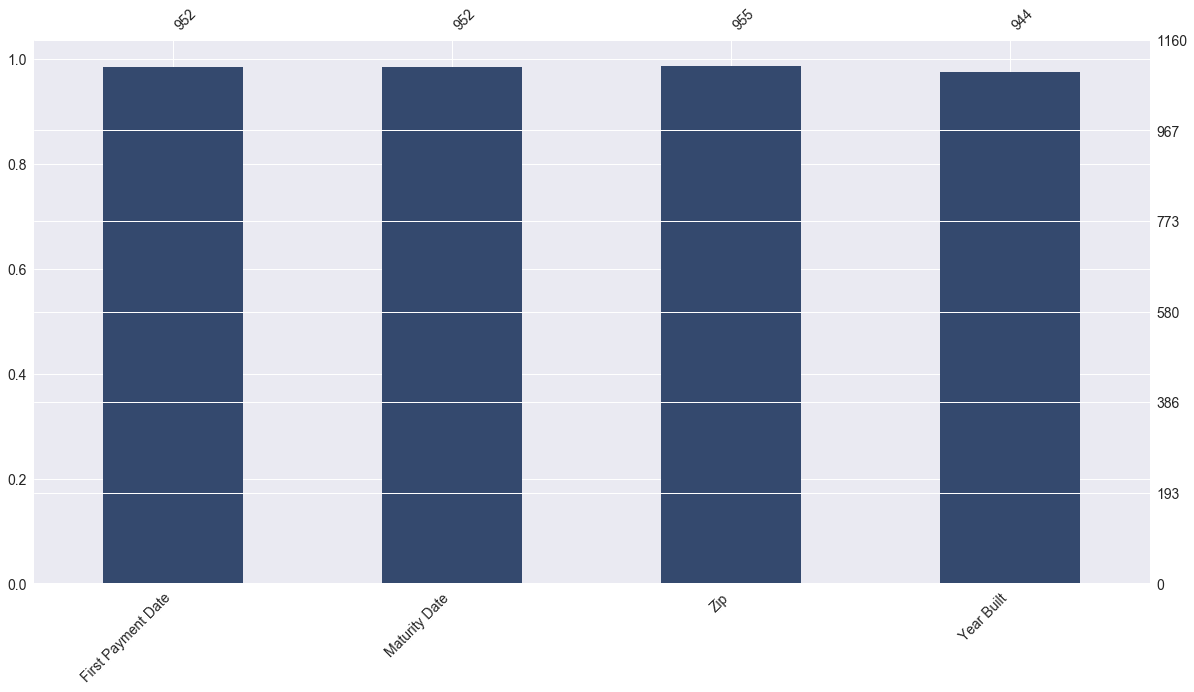

                          Total  Percentage
Year Built                   23    0.023785
Maturity Date                15    0.015512
First Payment Date           15    0.015512
Zip                          12    0.012410
Payroll Expense               0    0.000000
Utilities Expense             0    0.000000
Insurance Expense             0    0.000000
Taxes Expense                 0    0.000000
Parking Expense               0    0.000000
Maintenance Expense           0    0.000000
Total Operating Expenses      0    0.000000
Effective Gross Income        0    0.000000
Net Operating Income          0    0.000000
Property Value                0    0.000000
Loan Amount                   0    0.000000

 Number of records with no zipcode :  0

 Number of records with "Error" as the value in Property Value :  14
        Loan Amount           Zip  Net Operating Income  \
count  9.260000e+02    926.000000          9.260000e+02   
mean   5.253355e+06  44021.876890          5.267321e+05   
std    9

In [176]:
## PLot the vairables having missing data and thier count
missing = df.columns[df.isnull().any()].tolist()
msno.bar(df[missing],
            figsize=(20,10),color="#34496e",fontsize=14,labels=True,)

total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
print(missing_data.head(20))

print('\n Number of records with no zipcode : ', len(df[df['Zip'] < 1]))

# Changing the data type of Zip code to Integer from Float
df['Zip'] = df['Zip'].fillna(0).astype(int)


print('\n Number of records with "Error" as the value in Property Value : ', len(df[df['Property Value'] == 'Error']))

# Remove Error values from Property Value column
df = df[df['Property Value'] != 'Error']

# Remove null/ Na values from the data set
df = df.dropna(axis=0, how='any')

#print('\n df new : \n',df)

print(df.describe())

# Change the dtype of 'Property Value' from String to Float by removing junk values
df['Property Value'] = df['Property Value'].astype(float)

After Cleaning, the dataset has 926 rows and 15 columns. This will be used for further analysis

#### Processing the Year Built Variable
The Year Built variable has string values.
The year built variable has a couple of values like "1976, 1978" which will not be useful while building the predictive models. Hence i have split the values and taking the first value out of the two and converting the data type into integer.

In [177]:
# Retain the higher value
values = []
year_built_values = df['Year Built'].values
for i in year_built_values:
    if(i.find(',')):
        values.append(i.split(",")[0])
    else:
        values.append(i)
print(values)

df['Year Built'] = pd.Series(values, index = df.index)
print(df['Year Built'])

df.loc[df['Year Built'].str.contains('-'), 'Year Built']  = '1978'
print(df[df['Year Built'].str.contains('-')])

# Converting to Integer dtype
df['Year Built'] = df['Year Built'].astype(int)

['1965', '1960', '1959', '1976', '1952', '1974', '1924', '1943', '1928', '1927', '1990', '1979', '1972', '1931', '1973', '1981', '1961', '1997', '2014', '1983', '1965', '1992', '1984', '1874', '1928', '1942', '1973', '1974', '2006', '1978', '1930', '1929', '1971', '1868', '1973', '1930', '1972', '2015', '1905', '1925', '1962', '2003', '1979', '1931', '1968', '1905', '1930', '1965', '1914', '1990', '1988', '1969', '2015', '1970', '2010', '1960', '1931', '1983', '2009', '1929', '1979', '1920', '1976', '1905', '1952', '1909', '1973', '1900', '2016', '1975', '1973', '1969', '1984', '1950', '1972', '1979', '1973', '1931', '1970', '1983', '1914', '1931', '1953', '1962', '1920', '1938', '2009', '1969', '1984', '1985', '1965', '1899', '1979', '1912', '1967', '1972', '1969', '1978', '1974', '1910', '1917', '1910', '1974', '1920', '1979', '1910', '1905', '1916', '1978', '1925', '1962', '1931', '1988', '1968', '1931', '2006', '2015', '1983', '2016', '1974', '1970', '1991', '1966', '1987', '1973',

### Using uszipcode search engine library to fetch State information from zip codes.

In [178]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
states = []
for i in df['Zip'].values:
    states.append(search.by_zipcode(i).State)

# load the states list back into the data frame
df['State'] = states
print('\n ', df.head())


    First Payment Date Maturity Date  Loan Amount    Zip  Property Value  \
0         2017-06-01    2022-05-01   2143864.02  60077      3003400.24   
1         2017-06-01    2037-05-01   1445991.78  33441      1798349.30   
2         2017-06-01    2037-05-01   2725017.88  94597      1653153.29   
3         2017-07-01    2037-06-01   4203448.93  95670      7554077.66   
4         2017-06-01    2027-05-01    872183.47  90008      1306139.10   

   Year Built  Net Operating Income  Effective Gross Income  \
0        1965             153643.96               282027.80   
1        1960             105282.69               180649.26   
2        1959             230180.51               305261.44   
3        1976             509272.80               890801.66   
4        1952              68206.10               101021.26   

   Total Operating Expenses  Maintenance Expense  Parking Expense  \
0                 125597.78             18793.51          4608.95   
1                  75213.72        

### Correlation Analysis
The variables seem to have positive relationship with each other except for Zip code and parking expense and nothing looks way off the mark here. Since the size of the data is less and the objective of the problem does not prioritize feature selection, let us move onto answering the questions.

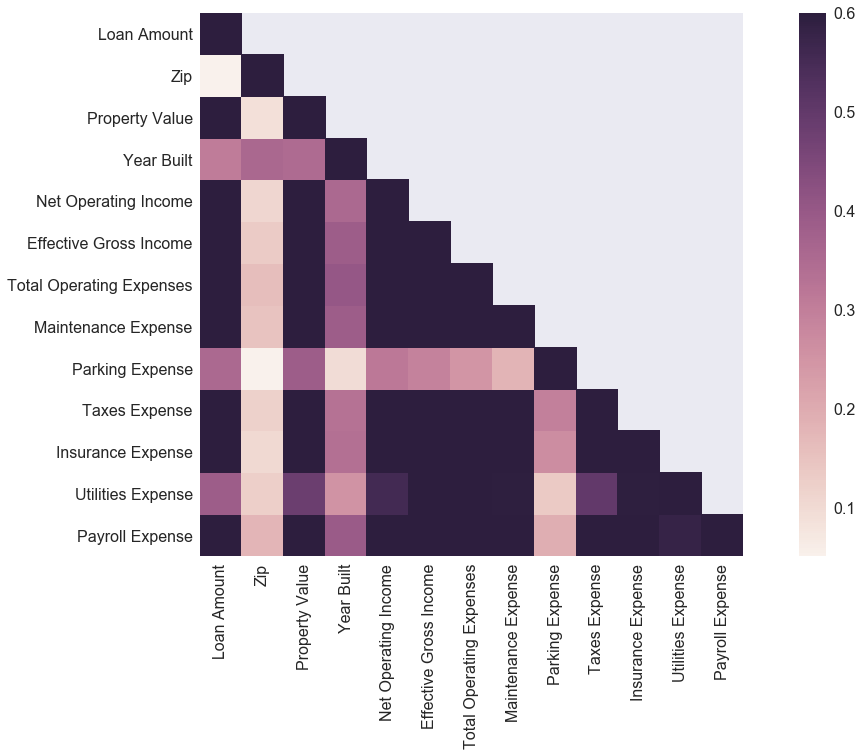

In [179]:
columns = ['Loan Amount','Zip','Property Value','Year Built','Net Operating Income','Effective Gross Income',
           'Total Operating Expenses','Maintenance Expense','Parking Expense','Taxes Expense','Insurance Expense',
           'Utilities Expense','Payroll Expense']
corrMatrix = df[columns].corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatrix, mask=mask,vmax= 0.6, square=True)

## Answers to Questions

## 2. a) State having the highest average loan amount 

State
OH    $18,849,807.25
UT    $18,102,120.49
AR    $14,091,579.64
PA    $12,725,051.52
GA    $12,702,878.86
NC    $12,610,142.89
AZ    $10,718,642.73
LA    $10,110,782.63
VA    $10,030,664.03
TX     $9,385,842.44
Name: Loan Amount, dtype: object

 State having the highest Avg. loan amount:  State
OH    $18,849,807.25
Name: Loan Amount, dtype: object


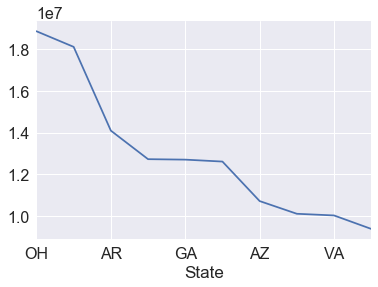

In [180]:
Avg_LoanAmnt_by_State = df['Loan Amount'].groupby(df['State']).mean()
top_states = Avg_LoanAmnt_by_State.nlargest(10)
top_states.plot()
top_state = top_states.nlargest(1)

top_states = top_states.map('${:,.2f}'.format)
print(top_states)

print('\n State having the highest Avg. loan amount: ', top_state.map('${:,.2f}'.format))



### Answer : State 'Ohio' has the highest average loan amount of $18,849,807.25

## 2. b) State having the highest taxes as a % of property value
I calculated the Property taxes % first by using the formula : (Taxes Expense / Property Value) * 100 and then grouped by state to look at the property taxes % for each state.

In [181]:
# Replacing 0 with nan so that we do not get infinity while dividing by 0.
df['Property taxes %'] = (df['Taxes Expense'] / df['Property Value'].replace({ 0 : np.nan })) * 100
print(df['Property taxes %'].head())

propertytaxes_pct = df['Property taxes %'].groupby(df['State']).mean()
print( '\n Top 5 States : \n',propertytaxes_pct.nlargest(5))

top_state_propertytaxes = propertytaxes_pct.nlargest(1)

propertytaxes_pct = propertytaxes_pct.map('{:,.2f}'.format)

print('\n State having the highest taxes as a % of property value: ', top_state_propertytaxes.map('{:,.2f}'.format))



0    1.384456
1    1.818658
2    2.362138
3    0.683272
4    0.846607
Name: Property taxes %, dtype: float64

 Top 5 States : 
 State
CT    2.141193
RI    1.765187
TX    1.739359
NJ    1.736261
WI    1.623121
Name: Property taxes %, dtype: float64

 State having the highest taxes as a % of property value:  State
CT    2.14
Name: Property taxes %, dtype: object


### Answer :  State 'Connecticut' has the highest property taxes as a % of property value

## 2. c) Strongest predictor of maintenance expense as a percentage of property value
Maintenance expense as a % of Property value = (Maintenance Expense / Property Value) * 100

0    0.625741
1    0.789661
2    0.700150
3    1.089592
4    0.548286
Name: Maintenance Expense Value %, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     75.14
Date:                Mon, 11 Dec 2017   Prob (F-statistic):          3.41e-127
Time:                        12:51:32   Log-Likelihood:                 762.04
No. Observations:                 926   AIC:                            -1498.
Df Residuals:                     913   BIC:                            -1435.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

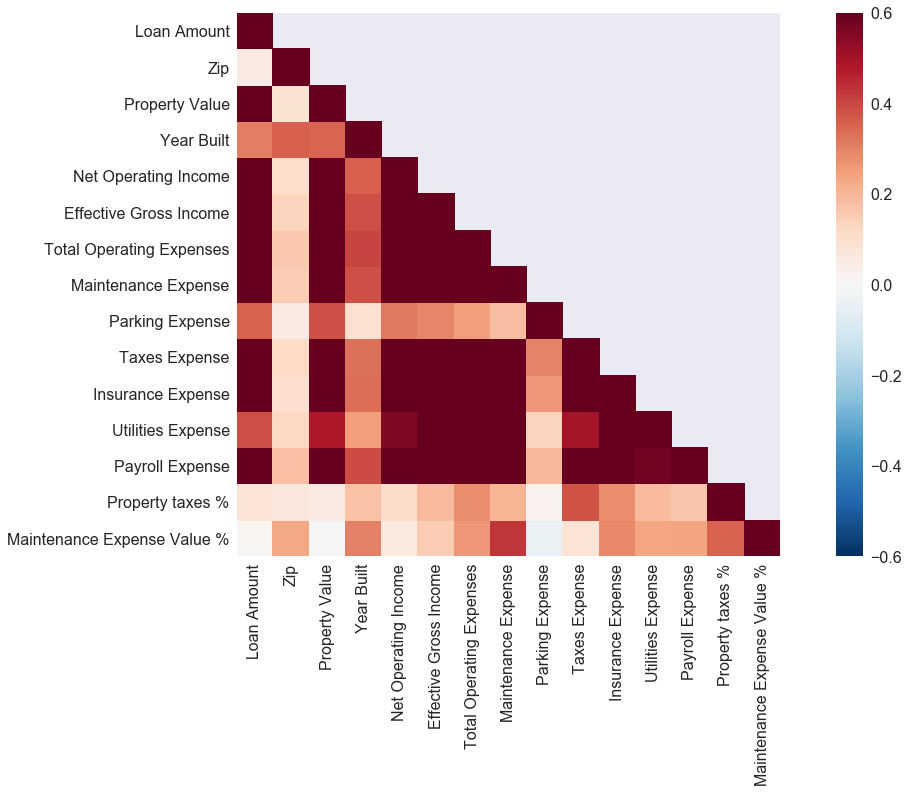

In [182]:
# Create variable maintenance expense value% 
df['Maintenance Expense Value %'] = (df['Maintenance Expense'] / df['Property Value'].replace({ 0 : np.nan })) * 100
print(df['Maintenance Expense Value %'].head())

# Replace all the nan's to 0's so that the variable can be fitted into a regression model
df['Maintenance Expense Value %'] = df['Maintenance Expense Value %'].fillna(0)

corrMatrix_new  = df.corr()
mask = np.array(corrMatrix_new)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatrix_new, mask=mask,vmax= 0.6, square=True)


# Run a linear Regression model to find out the variance between the predictors
#from sklearn import linear_model
import statsmodels.api as sm # import statsmodels 

#lm = linear_model.LinearRegression()


lm_X_columns = ['Loan Amount','Zip','Property Value','Net Operating Income','Effective Gross Income',
           'Total Operating Expenses','Maintenance Expense','Parking Expense','Taxes Expense','Insurance Expense',
           'Utilities Expense','Payroll Expense']

#Prepare the input and output data for the model
lm_X = df[lm_X_columns]
lm_y = df['Maintenance Expense Value %']

# Standardize the data to scale all the values to a normal distribution before fitting into a Regression model. 
# This ensures variables with different scale are treated equally 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_minmax = scaler.fit_transform(lm_X)
y_minmax = scaler.fit_transform(lm_y)
#lm_X_scaled = preprocessing.scale(lm_X)
#lm_y_scaled = preprocessing.scale(lm_y)

#print(x_minmax)
#print(y_minmax)

# Add a constant (intercept value) to the model
x_minmax = sm.add_constant(x_minmax)

lm_model = sm.OLS(y_minmax, x_minmax).fit()
lm_predictions = lm_model.predict(x_minmax)

# Print out the statistics
print(lm_model.summary())

print('\n')


## Outcome: 
#### The R-squared value of 0.497 denotes that the linear model does cover only 50% of the variance. Among all the variables only 2 of them have high coefficient values, Net Operating Income has a negative influence on the target variable. For every 1 unit of increase in Maintenance Expense Value %, the Net Operating Income decreases by 3.72 . However, Effective Gross Income has a positive influence on the target variable, for every 1 unit increase in Maintenance Expense Value % , the Effective Gross Income increases by 3.68. Both these variables have P-values close to 0 and are strong predictors of Maintenance Expense as a % of Property value.

## 2. d) Median, Range and Variance in Loan to Value 
Loan to value is one of the key risk factors that lenders assess when qualifying borrowers for a mortgage.
Loan to Value (LTV) represent the ratio of the first mortgage line as a percentage of the total appraised value of real property. Loan-To-Value Ratio = (Amount of the First Mortgage) / Value of the Property) x 100%.   It is customary in commercial real estate finance to calculate the loan-to-value ratio to one digit to the right of the decimal point, so i have rounded the values to one decimal point.

count    925.000000
mean      56.345856
std       26.418914
min        0.000000
25%       49.629722
50%       66.338136
75%       74.929847
max      164.837580
Name: Loan To Value Ratio, dtype: float64

 Median Loan to Value : 
 66.3%

 Range of Loan to Value : 
 164.8
  First Payment Date Maturity Date  Loan Amount    Zip  Property Value  \
2         2017-06-01    2037-05-01   2725017.88  94597      1653153.29   

   Year Built  Net Operating Income  Effective Gross Income  \
2        1959             230180.51               305261.44   

   Total Operating Expenses  Maintenance Expense  Parking Expense  \
2                  71830.08             11574.56              0.0   

   Taxes Expense  Insurance Expense  Utilities Expense  Payroll Expense State  \
2       39049.76            3869.46             381.04              0.0    CA   

   Property taxes %  Maintenance Expense Value %  Loan To Value Ratio  
2          2.362138                      0.70015            164.83758  

 Varian

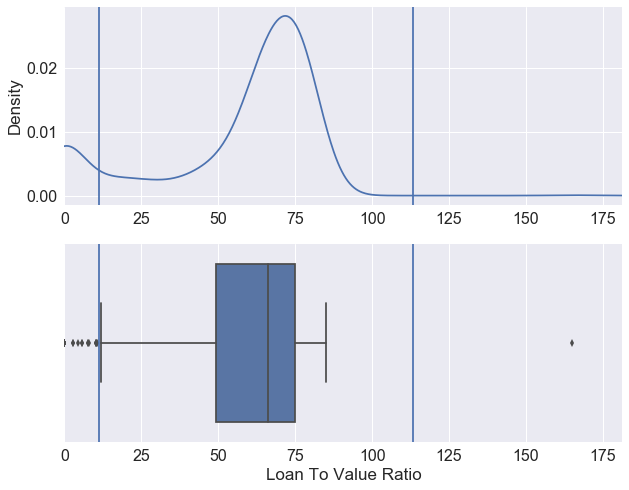

In [183]:
# Calculate Loan to Value ratio 
df['Loan To Value Ratio'] = (df['Loan Amount'] / df['Property Value'].replace({ 0 : np.nan })) * 100

print(df['Loan To Value Ratio'].describe())

# Replace all the nan's to 0's so that the variable can be fitted into a regression model
df['Loan To Value Ratio'] = df['Loan To Value Ratio'].fillna(0)

# Median LTV
median = df['Loan To Value Ratio'].median()
print('\n Median Loan to Value : \n', "{:,.1f}%".format(median))

#Range of LTV
range_LTV = (df['Loan To Value Ratio'].max() - df['Loan To Value Ratio'].min())
print('\n Range of Loan to Value : \n', "{:,.1f}".format(range_LTV))

print(df[df['Loan To Value Ratio'] >160])

# Variance in LTV
variance_LTV = df['Loan To Value Ratio'].var()
print('\n Variance in LTV : \n', variance_LTV)

# Inter-Quartile Range of LTV
i = 'Loan To Value Ratio'
df_LTV = pd.DataFrame()
df_LTV[i] = df[i]

q75, q25 = np.percentile(df_LTV[i].dropna(), [75 ,25])
iqr = q75 - q25

print('\n IQR : \n', iqr)

# Drop NA
#df_LTV.dropna(inplace=True)

# Determining Min and Max to detect outliers
min_LTV = q25 - (iqr*1.5)
max_LTV = q75 + (iqr*1.5)
print('\n min  :', min_LTV)
print('\n max  :', max_LTV)

# Visualizing the data to understand the distribution

# Density plot
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df_LTV[i].min(), df_LTV[i].max()*1.1)
plt.axvline(x=min_LTV)
plt.axvline(x=max_LTV)
ax = df_LTV[i].plot(kind='kde')

# Boxplot
plt.subplot(212)
plt.xlim(df_LTV[i].min(), df_LTV[i].max()*1.1)
sn.boxplot(x=df_LTV[i])
plt.axvline(x=min_LTV)
plt.axvline(x=max_LTV)

print('\n LTV data: \n',df_LTV.head())

outliers = df[((df[i] < min_LTV) == True) | ((df[i] > max_LTV) == True)]
print('\n Outliers: \n',outliers[i])

# There were 125 records that are outliers, after removing those outliers the cleaned LTV data gives the below range
df_LTV_clean = df[((df[i] > min_LTV) == True) & ((df[i] < max_LTV) == True)]

print('\n Clean data : \n ',df_LTV_clean[i])

# Range of LTV after removing outliers
range_LTV_clean = (df_LTV_clean['Loan To Value Ratio'].max() - df_LTV_clean['Loan To Value Ratio'].min())
print('\n Range of Loan to Value after removing outliers : \n', "{:,.1f}".format(range_LTV_clean))

# Variance in LTV
variance_LTV_clean = df_LTV_clean[i].var()
print('\n Variance in LTV after removing outliers: \n', variance_LTV_clean)


### Inference:  

#### Median = 66.3 %
#### Range =  73 % (After removing outliers)
#### Variance = 240 (After removing outliers)

The median value of LTV is 66.3 % which is close to the industry average of 75 %. The highest loan-to-value ratio one can get for an apartment loan from a conventional lender is 80% loan-to-value. In the United States, conforming loans that meet Fannie Mae and Freddie Mac underwriting guidelines are limited to an LTV ratio that is less than or equal to 80%.

The maximum LTV  is close to 164% , which is unusual , so i took a closer look at the data points through density and box plots, to find out if there are any outliers. From the Box plot it is evident that LTV has an outlier at 164%  and the values are densely populated between 50 and 75. In order to find  a proper range to eliminate outliers, I looked at IQR(Inter-Quartile Range), which is Q3 - Q1, and Min, Max values to figure out the optimal range and distribution of LTV ratio. All the values that lie outside the vertical lines are outliers and need to be removed in order to figure out the correct range.

### Range of Loan to Value after removing outliers is 73 % which is well within the guidelines. Which shows that the lender has been consistent in setting the loan amounts within the guidelines and taking less risk.
### Variance of 697.95 suggests that the LTV values are widely spread from the mean (56.34). Althought after removing the outliers the variance comes down to 240.

## 2. e) Property Vs Expenses analysis

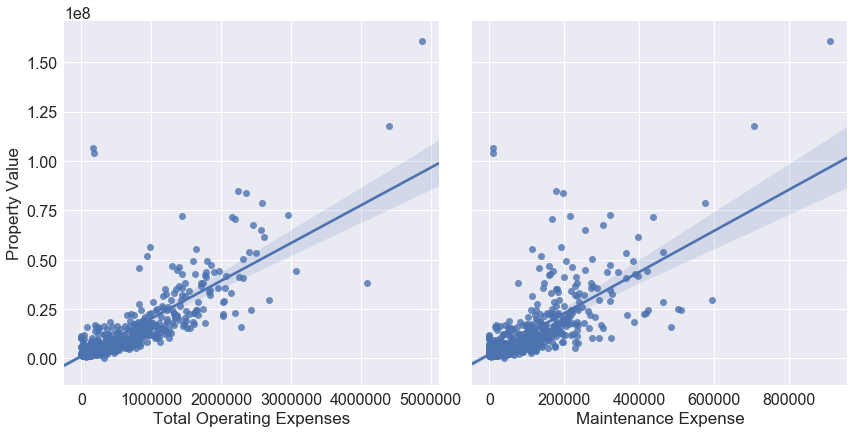

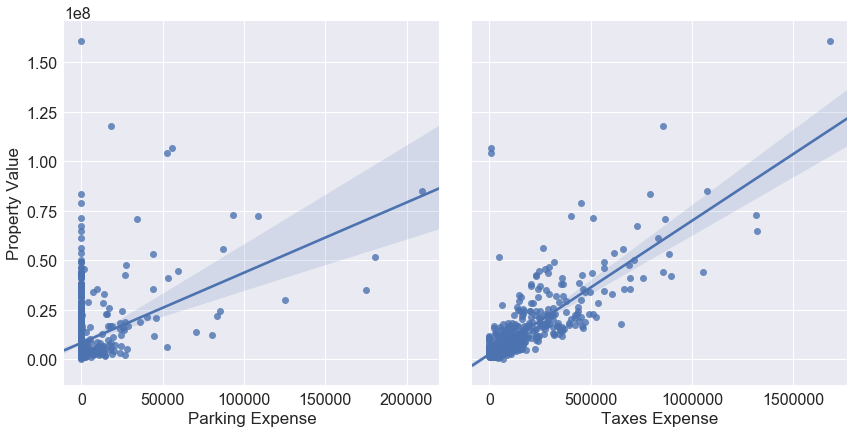

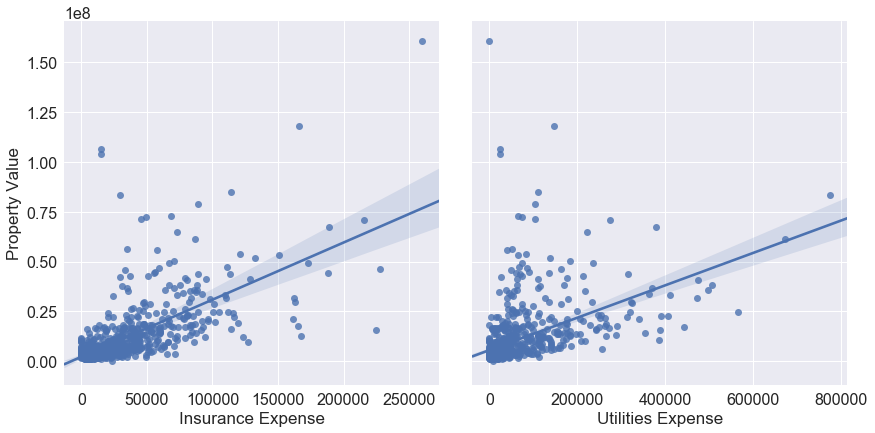

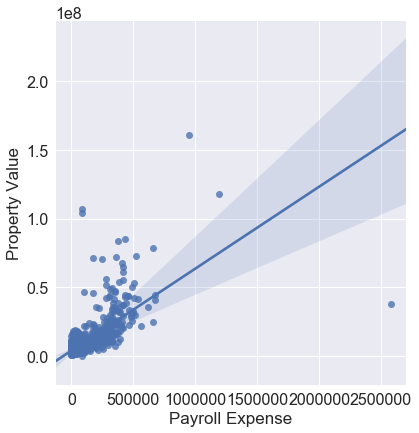

In [184]:
# Visualizing the relationship between Property value and Expenses by plotting them against each other individually.
columns = ['Property Value','Total Operating Expenses','Maintenance Expense','Parking Expense','Taxes Expense',
          'Insurance Expense','Utilities Expense','Payroll Expense']

# Fitting a linear Regression model to the scatter plot 
sn.pairplot(df[columns],x_vars= columns[1:3], y_vars = columns[0:1], kind = 'reg', size= 6)
sn.pairplot(df[columns],x_vars= columns[3:5], y_vars = columns[0:1], kind = 'reg', size= 6)
sn.pairplot(df[columns],x_vars= columns[5:7], y_vars = columns[0:1], kind = 'reg', size= 6)
sn.pairplot(df[columns],x_vars= columns[7:8], y_vars = columns[0:1], kind = 'reg', size= 6)

### Inference from the plots: 
#### The larger the valuations , higher the expenses is  a fundamental inference.
#### From all the plots , it can be inferred that larger value properties do exhibit higher expenses compared to small value properties.
#### During Economy of scale , the cost of producing one unit is less when many units are produced at once. For instance , the expenses should reduce when the properties with larger valuations increases.
#### From the above plots, there is not much evidence to prove that the higher valued properties exhibit any economies of scale.

## 3. a) Expense Ratio vs State
The operating expense ratio measures how much of a property’s potential income is consumed by expenses needed to operate the property. Expense Ratio = (Total Operating Expenses/ Effective Gross Income)

0    44.5%
1    41.6%
2    23.5%
3    46.9%
4    34.3%
Name: Expense Ratio, dtype: object
State
OK    60.281883
MS    55.942829
OH    55.740872
WI    55.283237
SC    54.611972
Name: Expense Ratio, dtype: float64
State
NY    29.356949
MA    33.217483
WA    34.149477
PA    35.645498
IL    36.420337
Name: Expense Ratio, dtype: float64


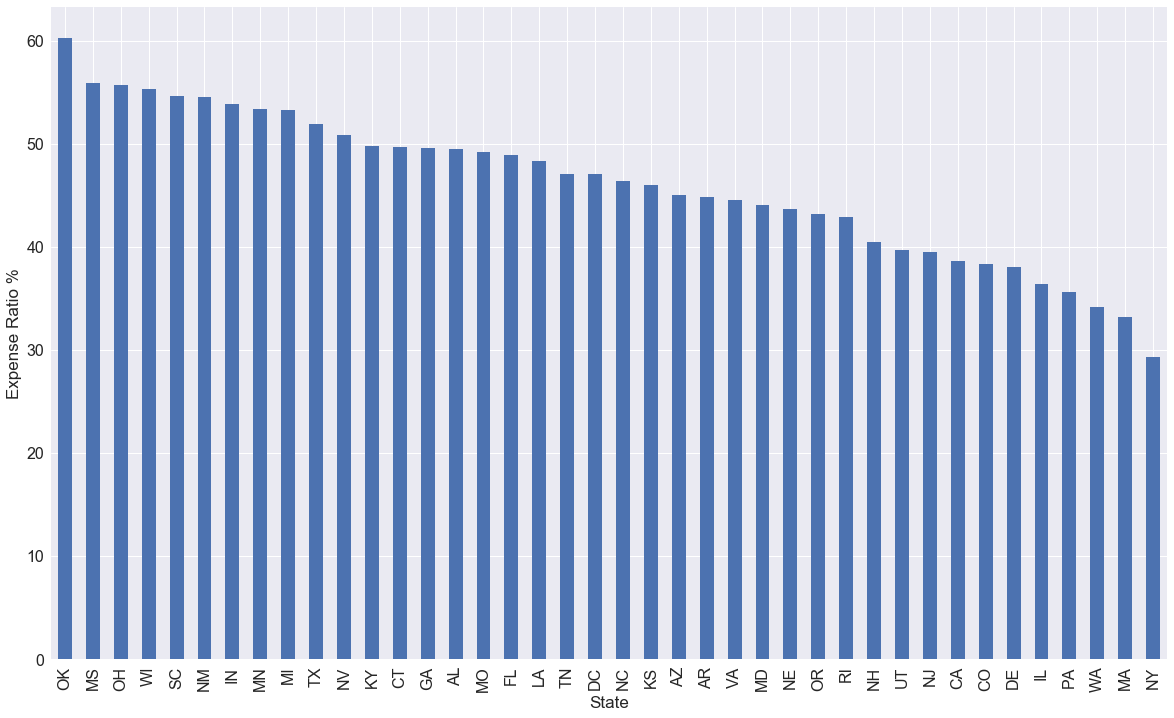

In [185]:
df['Expense Ratio'] = (df['Total Operating Expenses'] / df['Effective Gross Income'].replace({ 0 : np.nan })) * 100

print(df['Expense Ratio'].map('{:,.1f}%'.format).head())

Expense_ratio_per_State = df['Expense Ratio'].groupby(df['State']).mean()

print(Expense_ratio_per_State.nlargest(5))
print(Expense_ratio_per_State.nsmallest(5))
# Sort the values Descending order
Expense_ratio_per_State = Expense_ratio_per_State.sort_values(ascending=False)

plt.figure(figsize=(20,12))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
ax = Expense_ratio_per_State.plot(kind = 'bar')
ax.set_ylabel("Expense Ratio %")


#### The plot depicting Expense Ratio across states reveals the states having highest and the lowest expense Ratios. The state having the highest average expense Ratio is 'Oklahoma' with 60.28 % which may refer to the properties there being not profitable as the operating expenses are high. On the other hand , 'New york' has the lowest Expense Ratio with 29.35 % , which may suggest that the properties in New York are performing way better than in the other states in terms of generating profit.

## 3. b) Relationship between age of Property and Expenses

0    52
1    57
2    58
3    41
4    65
Name: Age of Property, dtype: int64

 Mean age of Property : 
 58.95140388768898


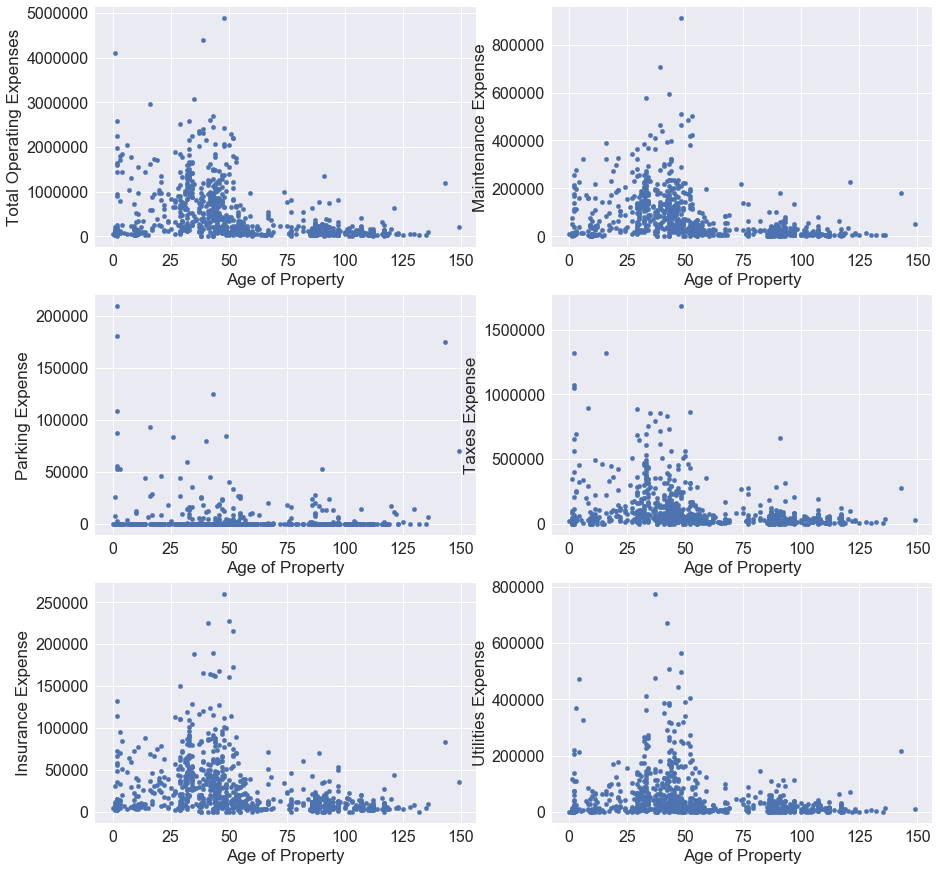

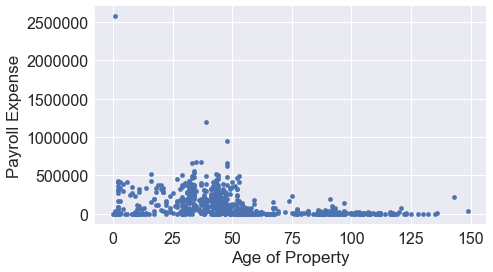

In [186]:
df['Age of Property'] = (2017 - df['Year Built'])
print(df['Age of Property'].head())

print('\n Mean age of Property : \n',df['Age of Property'].mean())

# Relationship between Age of Property and Total operating Expenses
col1 = ['Age of Property','Total Operating Expenses','Maintenance Expense','Parking Expense'
       ,'Taxes Expense','Insurance Expense','Utilities Expense', 'Payroll Expense']

#plot
fig1, ax1 = plt.subplots(3,2,figsize=(15,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[1], ax = ax1[0,0])

# Relationship betweeb Age of Property and Maintenance Expense
#fig2, ax1 = plt.subplots(figsize=(6,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[2], ax = ax1[0,1])

# Relationship betweeb Age of Property and Parking Expense
#fig3, ax1 = plt.subplots(figsize=(6,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[3], ax = ax1[1,0])

# Relationship betweeb Age of Property and Taxes Expense
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[4], ax = ax1[1,1])

# Relationship betweeb Age of Property and Insurance Expense
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[5], ax = ax1[2,0])

# Relationship betweeb Age of Property and Utilities Expense
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[6], ax = ax1[2,1])


# Relationship betweeb Age of Property and Payroll Expense
fig2, ax2 = plt.subplots(figsize=(7,4))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df.plot.scatter(x= col1[0], y= col1[7], ax = ax2)

### Interesting Inferences from the plots: 
1. Total Operating Expense is  high for the properties that are new and less than 50 years old.
2. Maintenance Expense shows similar trend as Total Operating expense.
4. Tax expenses are higher for newer buildings as they have higher valuations.
5. Insurance expense  is very high for 40 - 50 year old buildings and a similar trend is shown by Utilities expense as well. 
6. Payroll expense has stayed pretty flat below 500,000 , although it can be noted that it has reached that level only in the last 50 years.

## 3. c) Cumulative loan amount by fiscal quarter
I have calculated Fiscal Quarters based on US standards, i.e. the Quarter 1 starts in October and ends in December.


  0    3
1    3
Name: Quarter, dtype: int64

  0    2017
1    2017
Name: Year, dtype: int64

  0    2017-Q3
1    2017-Q3
Name: Fiscal Quarter, dtype: object
               Loan Amount
Year Quarter              
2010 1        9.927084e+05
2011 4        1.995223e+06
2012 4        2.222332e+06
2013 4        2.779757e+06
2014 2        3.381014e+06
     4        1.138306e+07
2015 1        1.079418e+07
     2        2.622253e+07
     3        3.765163e+07
     4        3.990133e+07
2016 1        1.008549e+09
     2        1.884987e+09
     3        2.517883e+09
     4        2.626590e+09
2017 1        0.000000e+00
     2        3.519960e+08
     3        1.144342e+09
     4        2.178742e+09
    Year  Quarter   Loan Amount
0   2010        1  9.927084e+05
1   2011        4  1.995223e+06
2   2012        4  2.222332e+06
3   2013        4  2.779757e+06
4   2014        2  3.381014e+06
5   2014        4  1.138306e+07
6   2015        1  1.079418e+07
7   2015        2  2.622253e+07
8   2015      

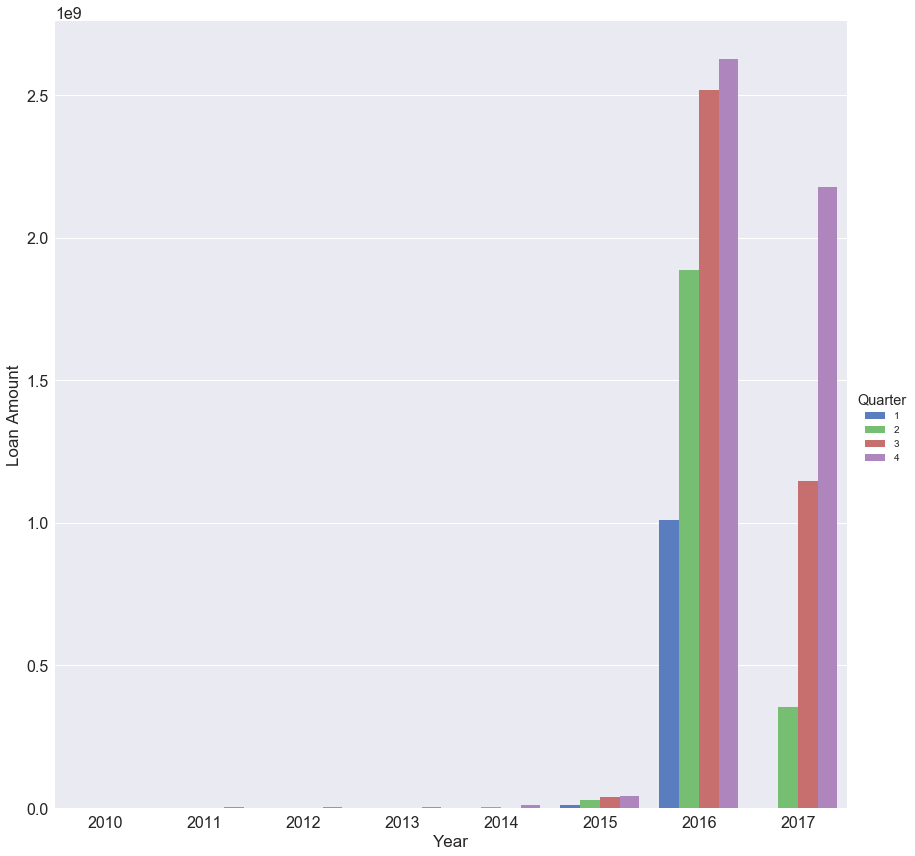

In [187]:
# Cumulative Loan Amount by Fiscal Quarter
# Find out the Fiscal Quarters
import datetime as dt
df['date'] = pd.to_datetime(df['First Payment Date'] ,format='%Y-%m-%d')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
def f(x):
    if x['Month'] >=1 and x['Month'] <=3:
        return 4
    elif x['Month'] >=4 and x['Month'] <=6:
        return 3
    elif x['Month'] >=7 and x['Month'] <=9:
        return 2
    elif x['Month'] >=10 and x['Month'] <=12:
        return 1
    
df['Quarter'] = df.apply(f, axis =1)
print('\n ',df['Quarter'].head(2))
print('\n ',df['Year'] .head(2))
df['Fiscal Quarter'] = df['Year'].astype(str) +'-Q' + df['Quarter'].astype(str)
print('\n ',df['Fiscal Quarter'] .head(2))
#print('\n ',df[['Fiscal Quarter', 'First Payment Date']])

# Groupby loan Amount by fiscal quarter
col_grp = ['Year','Quarter','Loan Amount']
df_cum = pd.DataFrame()
df_cum = df[col_grp]
df_sum = df_cum.groupby(['Year','Quarter']).sum()
cum_loan_Amount = df_sum.groupby('Year').cumsum()
print(cum_loan_Amount)

## Stacked bar chart
cum_loan_Amount = cum_loan_Amount.reset_index()
print(cum_loan_Amount)

g = sn.factorplot(x="Year", y="Loan Amount", hue="Quarter", data=cum_loan_Amount,
                   size=12, kind="bar", palette="muted")


### Inference: 
#### From the year 2015 to 2016 there's been a sudden peak in Loan Amount
#### Loan Amount seems to have increased more during Fiscal Quarter 2017 Q2, Q3 to Q4 when compared to 2016 Q2 , Q3 to Q4
### 

## 4. Predicting Loan To Value
Prepare the data set for model building

  First Payment Date Maturity Date  Loan Amount    Zip  Property Value  \
0         2017-06-01    2022-05-01   2143864.02  60077      3003400.24   
1         2017-06-01    2037-05-01   1445991.78  33441      1798349.30   
2         2017-06-01    2037-05-01   2725017.88  94597      1653153.29   
3         2017-07-01    2037-06-01   4203448.93  95670      7554077.66   
4         2017-06-01    2027-05-01    872183.47  90008      1306139.10   

   Year Built  Net Operating Income  Effective Gross Income  \
0        1965             153643.96               282027.80   
1        1960             105282.69               180649.26   
2        1959             230180.51               305261.44   
3        1976             509272.80               890801.66   
4        1952              68206.10               101021.26   

   Total Operating Expenses  Maintenance Expense       ...        \
0                 125597.78             18793.51       ...         
1                  75213.72             

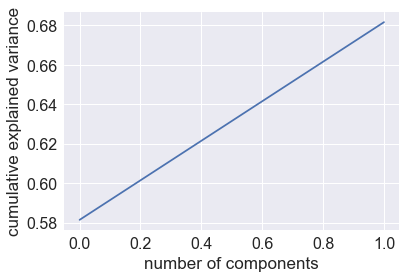

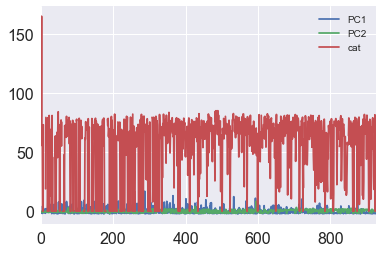

In [188]:
# import all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import RandomizedSearchCV 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import svm

# Feature Selection

print(df.head())

# Input and Target data set
cols = ['Year','Quarter','Loan Amount','Property Value','Year Built'
        ,'Net Operating Income','Effective Gross Income','Total Operating Expenses','Maintenance Expense'
        ,'Parking Expense','Taxes Expense','Insurance Expense','Utilities Expense','Payroll Expense']
X = df[cols]
y = df['Loan To Value Ratio']


## Standardize the data and apply PCA to reduce the dimensionality of the input data
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)
xScaled = sScaler.fit_transform(X)
yScaled = sScaler.fit_transform(y)
forPca = pd.DataFrame(xScaled)

# Split the data set into Training and testing
X_train, X_test, y_train, y_test = train_test_split(xScaled, yScaled, test_size=0.3, random_state=42)

print('\n' , X_train.shape) 
print('\n' , X_test.shape)
print('\n' , y_train.shape)
print('\n' , y_test.shape)

# Creating two PCA's that cover almost 100% variance in the data.
from sklearn.decomposition import PCA
pcaMod = PCA(n_components=2)
xPca = pcaMod.fit_transform(xScaled)
xPcaDataframe = pd.DataFrame(xPca, columns=['PC1', 'PC2'])
xPcaDataframe['cat'] = y
plt.plot(np.cumsum(pcaMod.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
xPcaDataframe.plot()

### Model Fitting

Let us examine different regression models to predict loan Amount.
Since the size of the data set is less than 100,000 , let us first look at the models that work with less number of records. I am going to try different Regressors as per Machine Learning algorithm guidelines and procedures. 
I started my model fitting process by trying out smaller algorithms first and subsequently moving to bigger ones like Ensemble methods which are powerful but require more computational power and processing time. 

Note: Throughout the model fitting process,I have used Grid Search (to fine tune the hyper parameters) & Cross Validation (to check the robustness of the model) to derive maximum performance from the models.
I have used MSE- Mean Squared Error metric to evaluate the model performance. MSE is the most popular and standard metric for evaluating Regressor models.

### 1) Lasso Regressor
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

In [189]:
reg_Lasso = linear_model.Lasso(alpha = 1.0, random_state = 1, warm_start = True )

# Fit and transform regressor on data
reg_Lasso = reg_Lasso.fit(X_train, y_train)
pred_Lasso = reg_Lasso.predict(X_test)

mse_Lasso = mean_squared_error(y_test, pred_Lasso)
mae_Lasso = mean_absolute_error(y_test, pred_Lasso)
print(reg_Lasso)
print("MSE: %.4f" % mse_Lasso)
print("MAE: %.4f" % mse_Lasso)

##### Parameter tuning using Grid Search Cv #####
# Parameter candidates
parameter_candidates= {'alpha': (0.0,1.0), 'copy_X': (True, False), 'fit_intercept': (True, False),
                      'max_iter': (1,1000), 'normalize': (True, False), 'positive': (True, False),
                      'random_state': (1,1000), 'tol': (0.0,1.0),'warm_start': (True, False),}

# Create a classifier object with the classifier and parameter candidates
reg_Lasso_GS = GridSearchCV(estimator= reg_Lasso, param_grid=parameter_candidates, n_jobs=-1 , cv =5)

# Train the classifier on data's feature and target data
reg_Lasso_GS.fit(X_train, y_train) 

# Explore the results
# View the score
print('\n Best score for data:', reg_Lasso_GS.best_score_) 
print('\n Best parameters : ', reg_Lasso_GS.best_params_)
print('mean_score',np.array(reg_Lasso_GS.cv_results_['mean_test_score']).mean())

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=True)
MSE: 0.9328
MAE: 0.9328

 Best score for data: 0.258219177241

 Best parameters :  {'alpha': 0.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': 1000, 'normalize': True, 'positive': False, 'random_state': 1, 'tol': 1.0, 'warm_start': True}
mean_score 0.0714623028616


### 2) Elastic Net Regressor
The Elastic Net is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

In [190]:
reg_enet = linear_model.ElasticNet(alpha= 0.0511)

### Fit and transform regressor on data
pred_enet = reg_enet.fit(X_train, y_train)
mse_enet = mean_squared_error(y_test, pred_enet.predict(X_test))
print(reg_enet)
print("MSE: %.4f" % mse_enet)


##### Parameter tuning using ElasticNet Cv #####
reg_enet_CV = linear_model.ElasticNetCV( cv=5, random_state = 0)

pred_enet_CV = reg_enet_CV.fit(X_train, y_train)
mse_enet_CV = mean_squared_error(y_test, pred_enet_CV.predict(X_test))
mae_enet_CV = mean_absolute_error(y_test, pred_enet_CV.predict(X_test))
print('\nalpha :',pred_enet_CV.alpha_)
print("\n MSE: %.4f \n" % mse_enet_CV)
print("\n MAE: %.4f \n" % mse_enet_CV)

ElasticNet(alpha=0.0511, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MSE: 0.6846

alpha : 0.0511288418693

 MSE: 0.6846 


 MAE: 0.6846 



### 3) Ridge Regressor

In [191]:
reg_Ridge = linear_model.Ridge(alpha= 10.0)

reg_Ridge = reg_Ridge.fit(X_train, y_train)
mse_Ridge = mean_squared_error(y_test, reg_Ridge.predict(X_test))
print(reg_Ridge)
print("MSE: %.4f" % mse_Ridge)

#Parameter tuning using RidgeCV
reg_Ridge_CV = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg_Ridge_CV = reg_Ridge_CV.fit(X_train, y_train)
mse_Ridge = mean_squared_error(y_test, reg_Ridge_CV.predict(X_test))
mae_Ridge = mean_absolute_error(y_test, reg_Ridge_CV.predict(X_test))
print(reg_Ridge_CV)
print(reg_Ridge_CV.alpha_)
print("MSE: %.4f" % mse_Ridge)
print("MAE: %.4f" % mae_Ridge)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
MSE: 0.6940
RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
10.0
MSE: 0.6940
MAE: 0.6168


### 4)  SVR Support Vector Regressor - Linear
Linear model fitted by minimizing a regularized empirical loss with SGD.
SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [192]:
## Fitted the model with PCA values
# Split the data set into Training and testing
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(xPca, yScaled, test_size=0.3, random_state=42)

reg_linearSVM = linear_model.SGDRegressor(penalty='l2')
reg_linearSVM = reg_linearSVM.fit(X_train_new, y_train_new)
mse_linearSVM = mean_squared_error(y_test_new, reg_linearSVM.predict(X_test_new))
print(reg_linearSVM)
print("\n MSE: %.4f \n" % mse_linearSVM)

##### Parameter tuning using Grid Search Cv #####
# Paramater candidates
parameters_SVM = {'alpha': (0.1,1.0), 'average': (True, False),'eta0': (0.1,1.0), 'fit_intercept': (True, False),
                      'l1_ratio': (0.0,1.0), 'learning_rate': ('invscaling', 'optimal', 'constant'), 
                  'loss': ('squared_epsilon_insensitive','epsilon_insensitive'),
                      'n_iter': (1,100), 'epsilon': (0.0,1.0),'shuffle': (True, False), 'warm_start':(True, False), }

reg_linearSVM_CV = GridSearchCV(estimator= reg_linearSVM, param_grid=parameters_SVM, n_jobs=-1 , cv =5)
reg_linearSVM_CV = reg_linearSVM_CV.fit(X_train, y_train)
mse_linearSVM_CV = mean_squared_error(y_test, reg_linearSVM_CV.predict(X_test))
mae_linearSVM_CV = mean_absolute_error(y_test, reg_linearSVM_CV.predict(X_test))
print(reg_linearSVM_CV)
print(reg_linearSVM_CV.best_estimator_)
print("\n MSE: %.4f \n" % mse_linearSVM_CV)
print("\n MAE: %.4f \n" % mae_linearSVM_CV)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

 MSE: 0.9309 

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': (0.1, 1.0), 'average': (True, False), 'eta0': (0.1, 1.0), 'fit_intercept': (True, False), 'l1_ratio': (0.0, 1.0), 'learning_rate': ('invscaling', 'optimal', 'constant'), 'loss': ('squared_epsilon_insensitive', 'epsilon_insensitive'), 'n_iter': (1, 100), 'epsilon': (0.0, 1.0), 'shuffle': (True, False), 'warm_star

Even with PCA the model does not provide us with an improved MSE score. The model with just Scaled values provides us with MSE of 0.6443.

### 6) Gradient Boosting Regressor  - Ensemble methods

In [193]:
# Fit regression model - GBR 
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
reg_GBR = ensemble.GradientBoostingRegressor(**params)

reg_GBR.fit(X_train, y_train)

# Performance of the model 
mse_GBR = mean_squared_error(y_test, reg_GBR.predict(X_test))
print(reg_GBR)
print("MSE: %.4f" % mse_GBR)
mae_GBR = mean_absolute_error(y_test, reg_GBR.predict(X_test))
print("MAE: %.4f" % mae_GBR)

feature_importance = reg_GBR.feature_importances_
print(feature_importance)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
MSE: 0.0845
MAE: 0.1686
[ 0.0005962   0.00274532  0.57079169  0.35055715  0.01131245  0.01382073
  0.00306041  0.00571434  0.0047442   0.00080314  0.0023934   0.01723721
  0.00645933  0.00976442]


Grid Search CV for Gradient Boosting Algorithm. I am using a separate cell for this because this might take several minutes to complete and i suggest to try this last after completing every other cell. Boosting algorithms are powerful and require lot of computational power to process. But i think we can get an improved model by tuning the parameters.

In [ ]:
##### Parameter tuning using Grid Search Cv #####
# Paramater candidates
parameters_GBR = {'alpha': (0.1,1.0), 'n_estimators': (1,500),'max_depth': (1,40), 'min_samples_split': (0.2,15.0),
                      'loss': ('ls','lad', 'huber', 'quantile'), 'learning_rate': (0.1, 1.0 ), 
                  'max_features': ('auto','sqrt','log2'), 'max_leaf_nodes': (2, 50 ),
                      'warm_start': (True,False), 'min_impurity_split': (0.1,1.0),
                  'min_samples_leaf': (0.2, 0.49), 'min_samples_split':(0.2, 0.99), }

reg_GBR_CV = GridSearchCV(estimator= reg_GBR, param_grid=parameters_GBR, n_jobs=-1 , cv =5)
reg_GBR_CV = reg_GBR_CV.fit(X_train, y_train)
mse_GBR_CV = mean_squared_error(y_test, reg_GBR_CV.predict(X_test))
print(reg_GBR_CV)
print(reg_GBR_CV.best_estimator_)
print("\n MSE: %.4f \n" % mse_GBR_CV)

### Note: The Gradient Boosting Trees might take longer time to execute compared to other models  as it  involves processing 100's of DT's.  

## Model Performance
In order to choose the best model out of the models that were fitted, I looked at the Mean Squared Errors and the Mean Absolute Errors (MSE & MAE) of each model. Both MSE and MAE gives us an idea on magnitude of the error and in order to find the best model the Error must be reduced.An error value close to 0 is defined as the perfect model. 

### Note:  The maximum performance that we get is around 0.084 of MSE and this could be improved by adding more data to the traning and by exploring other sophisticated Regressor models. We could even try feature selection , to drill down to the most important features and then applying them to the models to improve the model performance. Applying K- Fold Cross validation separately and analyzing the model performance individually can also lead to improved  model performance.

   Elastic Net  Gradient Boosting Regressor     Lasso  Linear SVR     Ridge
0     0.684615                     0.084455  0.932826    0.644344  0.693963


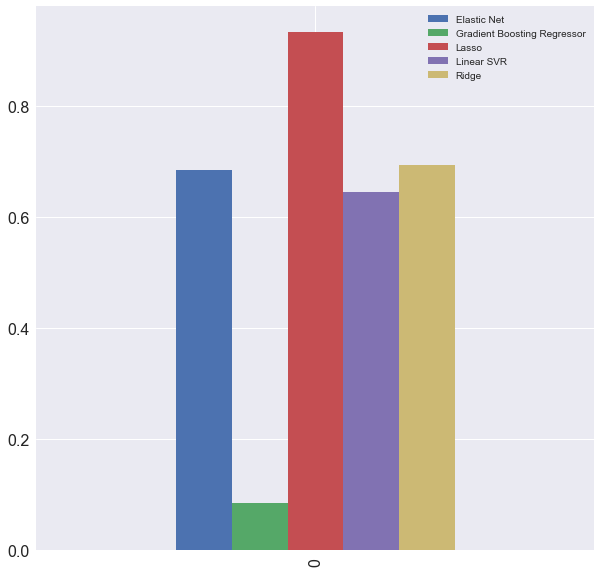

In [195]:
model_perf = {'Lasso' : (mse_Lasso), 'Elastic Net' : (mse_enet), 'Ridge' : (mse_Ridge), 
              'Linear SVR' : (mse_linearSVM_CV), 'Gradient Boosting Regressor' : (mse_GBR)}
df_Models = pd.DataFrame([model_perf])
print(df_Models)

#plot
fig4, ax4 = plt.subplots(figsize=(10,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=17)
df_Models.plot(kind = 'bar', ax= ax4)

From the plot it is evident that the Gradient Boosting model which uses large number of decision trees to learn and boost itself by re-using the weaker trees in the model, gives us the best performance and the second best is linear SVR which considers the data points in higher dimensional space to best fit the regressor.